# Some markdown

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sns.set_theme()

In [4]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [6]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


Text(0, 0.5, 'Signal Change')

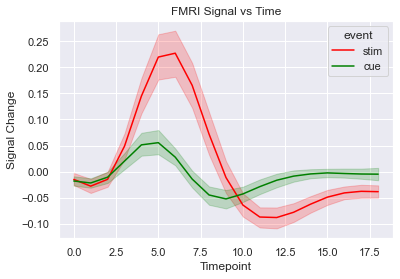

In [14]:
sns.lineplot(x="timepoint", y="signal", hue="event", palette=["red", "green"], data=fmri)
plt.title("FMRI Signal vs Time")
plt.xlabel("Timepoint")
plt.ylabel("Signal Change")

In [10]:
#line is estimates and greyed area is confidence

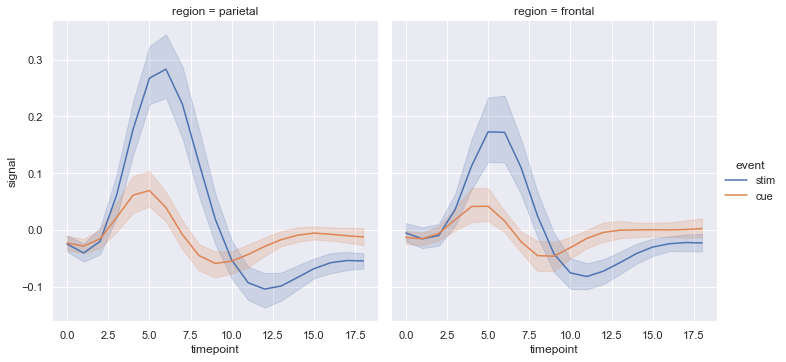

In [15]:
sns.relplot(x="timepoint", y="signal", col="region", hue="event", kind="line", data=fmri)

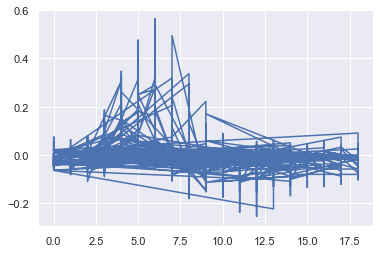

In [16]:
plt.plot(fmri.timepoint, fmri.signal)

In [17]:
#new dataset

In [19]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='day'>

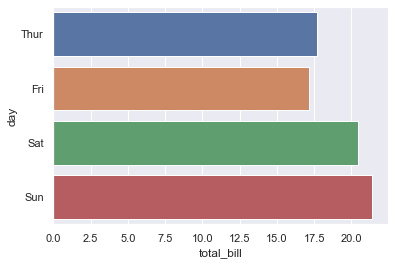

In [22]:
sns.barplot(y="day", x="total_bill", data=tips, ci=None)

In [23]:
#catplot for multiple categorical plots 

<BarContainer object of 244 artists>

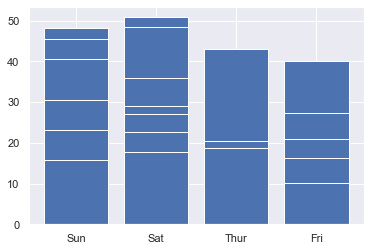

In [25]:
plt.bar(tips.day, tips.total_bill)

In [26]:
#########


In [29]:
male = tips[tips["sex"] == "Male"]
female = tips[tips["sex"] == "Female"]

mday = male.groupby("day").mean()
fday = female.groupby("day").mean()

totals = mday.merge(fday, right_index=True, left_index=True)
totals

,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y
day,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444


In [30]:
# x is male, y female. y is always the one that is joined on.

In [31]:
totals["total"] = totals["tip_x"] + totals["tip_y"]
totals

,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y,total
day,,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750,5.555958
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111,5.474111
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000,5.885684
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444,6.587567


In [33]:
totals["proportion_m"] = np.true_divide(totals["tip_x"],totals["total"]) * 100
totals["proportion_f"] = np.true_divide(totals["tip_y"],totals["total"]) * 100
totals

,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y,total,proportion_m,proportion_f
day,,,,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750,5.555958,53.642111,46.357889
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111,5.474111,49.195202,50.804798
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000,5.885684,52.396600,47.603400
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444,6.587567,48.885192,51.114808


<BarContainer object of 4 artists>

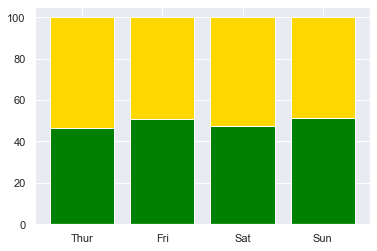

In [35]:
plt.bar(totals.index, totals.proportion_m, label="Male", color="gold", bottom=totals.proportion_f)
plt.bar(totals.index, totals.proportion_f, label="Female", color="green")

In [36]:
##########

In [37]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


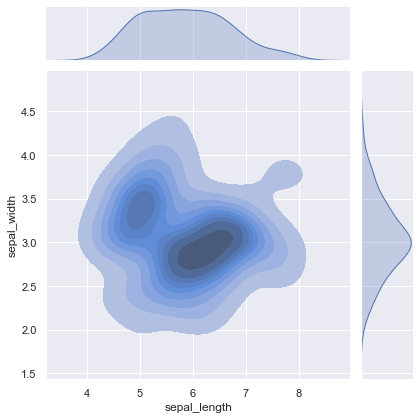

In [56]:
sns.jointplot(x=iris['sepal_length'], y=iris['sepal_width'], kind="kde", fill=True)

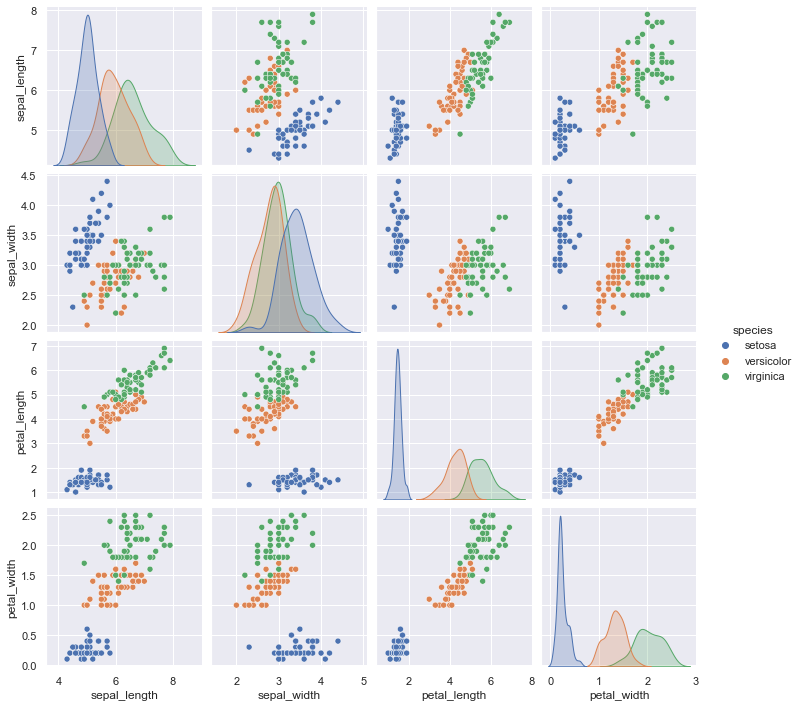

In [41]:
sns.pairplot(iris, hue="species")